In [80]:
#importy
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [81]:
#funkcja do rysowania wykresow
def showPlots(T, X, Y, E, L):
    plt.title("Tor ruchu")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(X, Y)
    plt.show()

    plt.subplot(2,2,1)
    plt.title("x(t)")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.plot(T, X)

    plt.subplot(2,2,2)
    plt.title("y(t)")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.plot(T, Y)

    plt.subplot(2,2,3)
    plt.title("E(t)")
    plt.xlabel("t")
    plt.ylabel("Energia całkowita")
    plt.plot(T, E)

    plt.subplot(2,2,4)
    plt.title("L(t)")
    plt.xlabel("t")
    plt.ylabel("Moment pędu")
    plt.plot(T, E)

    plt.tight_layout()
    plt.show()

In [82]:
#funkcje liczace energie oraz moment pedu
Ec = lambda x,y,vx,vy: 0.5*(vx*vx + vy*vy) - (x*x + y*y) ** (-0.5)
Lc = lambda x,y,vx,vy: x*vy + y*vx

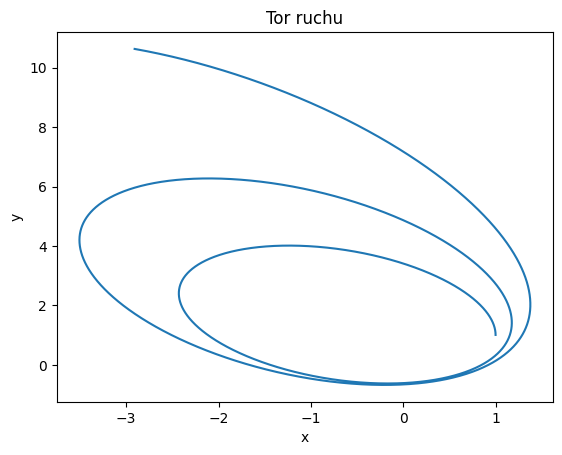

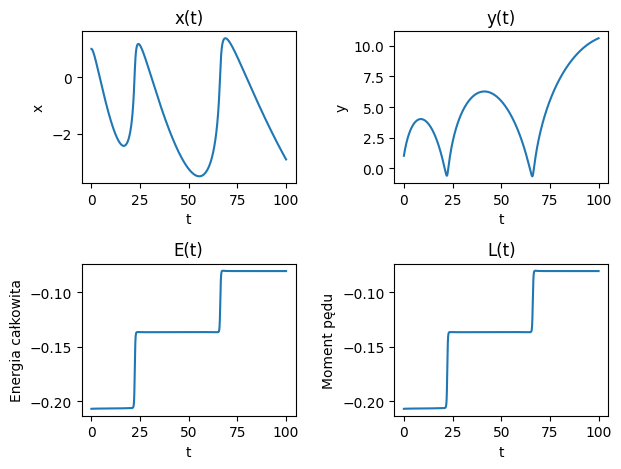

In [83]:
#JAWNA METODA EULER'A

#zmienne uzytkowe
e = 0
t = 0
dt = 0.01

#zmienne do wykresow
T = []
X = []
Y = []
E = []
L = []

#warunki poczatkowe
GM = 1
x = 1-e
vx = 0
y = 1
vy = ((1+e) / (1-e)) ** 0.5


while(t < 100):
    #zmienne pomocnicze
    t += dt
    R = (x*x + y*y) ** 0.5

    #stare wartosci
    xk = x 
    yk = y

    #wyznaczanie kolejnych wartosci
    x = xk + dt* vx
    vx = vx - dt * GM * xk * R ** (-3)

    y = yk + dt * vy
    vy = vy - dt * GM * yk * R ** (-3)


    #dane do wykresow
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(Ec(x,y,vx,vy))
    L.append(Lc(x,y,vx,vy))


#rysowanie wykresow
showPlots(T,X,Y,E,L)



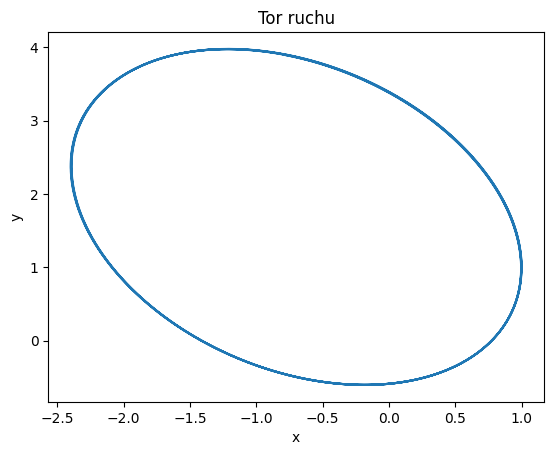

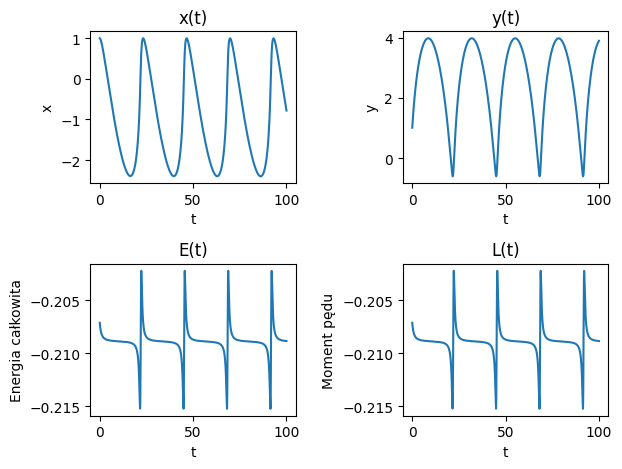

In [84]:
#NIEJAWNA METODA EULER'A

#zmienne uzytkowe
e = 0
t = 0
dt = 0.01

#zmienne do wykresow
T = []
X = []
Y = []
E = []
L = []

#warunki poczatkowe
GM = 1
x = 1-e
vx = 0
y = 1
vy = ((1+e) / (1-e)) ** 0.5


while(t < 100):
    #zmienne pomocnicze
    t += dt
    R = (x*x + y*y) ** 0.5

    xk = x 
    yk = y


    #wyznaczanie kolejnych wartosci
    x = (x + dt * vx) / (1 + dt*dt*GM*R**(-3))
    vx = vx - dt * GM * xk * R ** (-3)

    y = (y + dt * vy) / (1 + dt*dt*GM*R**(-3))
    vy = vy - dt * GM * yk * R ** (-3)

    #dane do wykresow
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(Ec(x,y,vx,vy))
    L.append(Lc(x,y,vx,vy))


#rysowanie wykresow
showPlots(T,X,Y,E,L)


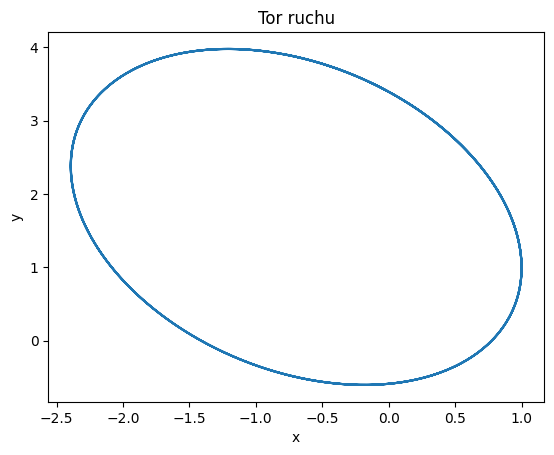

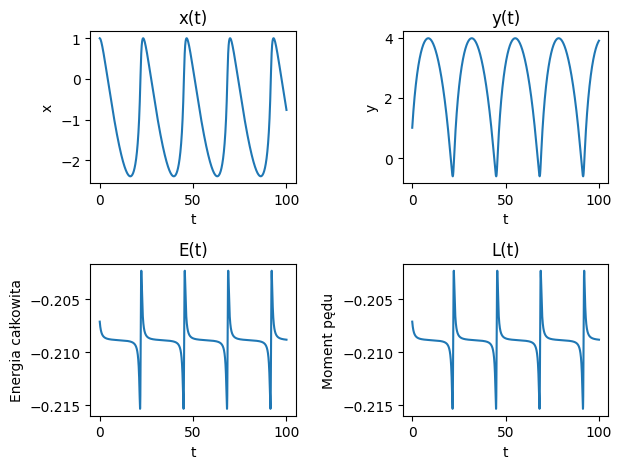

In [85]:
#PÓŁJAWNA METODA EULER'A

#zmienne uzytkowe
e = 0
t = 0
dt = 0.01

#zmienne do wykresow
T = []
X = []
Y = []
E = []
L = []

#warunki poczatkowe
GM = 1
x = 1-e
vx = 0
y = 1
vy = ((1+e) / (1-e)) ** 0.5


while(t < 100):
    #zmienne pomocnicze
    t += dt
    R = (x*x + y*y) ** 0.5


    #wyznaczanie kolejnych wartosci
    vx = vx - dt * GM * x * R ** (-3)
    x = x + dt * vx

    vy = vy - dt * GM * y * R ** (-3)
    y = y + dt * vy

    #dane do wykresow
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(Ec(x,y,vx,vy))
    L.append(Lc(x,y,vx,vy))


#rysowanie wykresow
showPlots(T,X,Y,E,L)


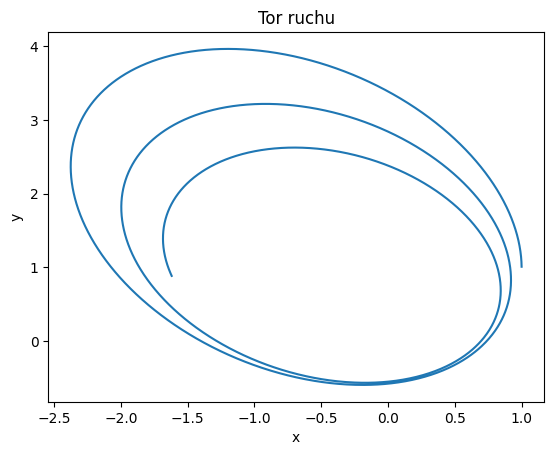

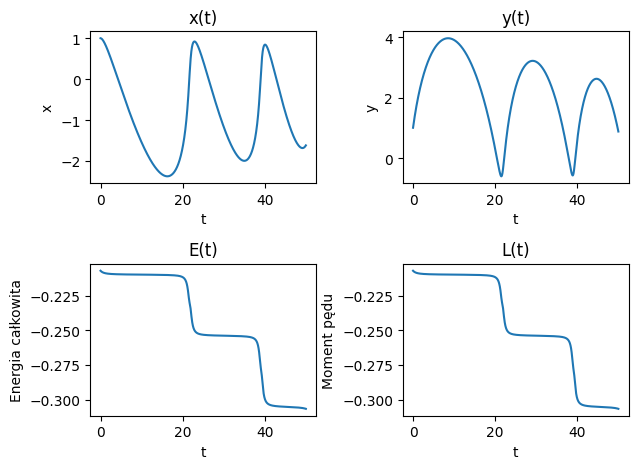

In [86]:
#METODA RUNGEGO-KUTTY CZWARTEGO RZĘDU (RK4)

#zmienne uzytkowe
e = 0
t = 0
dt = 0.01

#zmienne do wykresow
T = []
X = []
Y = []
E = []
L = []

#warunki poczatkowe
GM = 1
x = 1-e
vx = 0
y = 1
vy = ((1+e) / (1-e)) ** 0.5


while(t < 50):
    #zmienne pomocnicze
    t += dt
    R = (x*x + y*y) ** 0.5

    xk = x 
    yk = y


    #wyznaczanie kolejnych wartosci
    k1 = vx - dt * GM * R ** (-3) * x
    k2 = vx - 0.5 * dt * GM * R ** (-3) * (3*x + dt*k1)
    k3 = vx - 0.5 * dt * GM * R ** (-3) * (3*x + dt*k2)
    k4 = vx - dt * GM * R ** (-3) * (2*x + dt*k3)

    x = x + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    vx = vx - dt * GM * xk * R ** (-3)

    k1 = vy - dt * GM * R ** (-3) * y
    k2 = vy - 0.5 * dt * GM * R ** (-3) * (3*y + dt*k1)
    k3 = vy - 0.5 * dt * GM * R ** (-3) * (3*y + dt*k2)
    k4 = vy - dt * GM * R ** (-3) * (2*y + dt*k3)

    y = y + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    vy = vy - dt * GM * yk * R ** (-3)

    #dane do wykresow
    T.append(t)
    X.append(x)
    Y.append(y)
    E.append(Ec(x,y,vx,vy))
    L.append(Lc(x,y,vx,vy))


#rysowanie wykresow
showPlots(T,X,Y,E,L)

